In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sourcesep.utils.config import load_config
sns.set()

paths = load_config(dataset_key='pilot')

Paths are for dataset tagged: pilot


In [2]:
GCaMP8s_1 = pd.read_hdf(paths['data_dir']/'pilot.hdf5', key='GCaMP8s_1',more='r')
print(GCaMP8s_1.head(2))
print('\n')

GCaMP8s_2 = pd.read_hdf(paths['data_dir']/'pilot.hdf5', key='GCaMP8s_2',more='r')
print(GCaMP8s_2.head(2))
print('\n')

GCaMP8s_3 = pd.read_hdf(paths['data_dir']/'pilot.hdf5', key='GCaMP8s_3',more='r')
print(GCaMP8s_3.head(2))
print('\n')

HbAbs = pd.read_hdf(paths['data_dir']/'pilot.hdf5', key='HbAbs',more='r')
print(HbAbs.head(2))
print('\n')

IndicatorSpectra = pd.read_hdf(paths['data_dir']/'pilot.hdf5', key='IndicatorSpectra',more='r')
print(IndicatorSpectra.head(2))

       time       signal
0  0.000000  2539.738556
1  0.024409  2556.222711


      time       signal
0  0.00000  1646.507353
1  0.07469  1665.477941


       time       signal
0  0.000000  2112.720760
1  0.013369  2095.124269


   wavelength  Hb02 (cm-1/M)  Hb (cm-1/M)
0         250       106112.0     112736.0
1         252       105552.0     112736.0


   wavelength  EGFP ex  EGFP em
0         300   0.0962      NaN
1         301   0.0872      NaN


 - $µ_\textrm{oxy}(\lambda)$ is column `Hb02` in HbAbs
 - $µ_\textrm{deoxy}(\lambda)$ is column `Hb` in HbAbs

### Extinction cefficient for hemoglobin
 - source: https://omlc.org/spectra/hemoglobin/summary.html
 - $e$ is extinction coefficient (in per centimeter per Molar; Molar is moles per Liter)
 - $x$ is (in grams per liter) 
 - $l$ is cuvette length is (in centimeters), 
 - $M_{\textrm{Hg}}$ is molar mass of Hemoglobin (in grams per mole) = 64,500 g/mole
 - $A$ is the absorbance, calculated as $A = \frac{e \times x \times {l}}{M_{\textrm{Hg}}}$

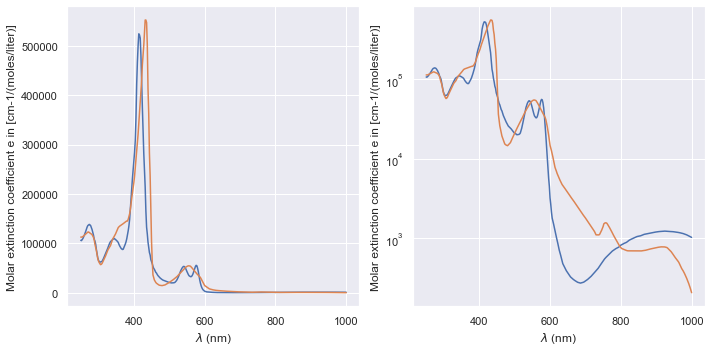

In [3]:
#to do set y to log scale
f, ax = plt.subplots(1,2,figsize=(10,5))
ax[0].plot(HbAbs['wavelength'], HbAbs['Hb02 (cm-1/M)'], label='oxy-hemoglobin')
ax[0].plot(HbAbs['wavelength'], HbAbs['Hb (cm-1/M)'], label='deoxy-hemoglobin')
ax[0].set(xlabel=r'$\lambda$ (nm)', ylabel='Molar extinction coefficient e in [cm-1/(moles/liter)]', yscale='linear')

ax[1].plot(HbAbs['wavelength'], HbAbs['Hb02 (cm-1/M)'], label='oxy-hemoglobin')
ax[1].plot(HbAbs['wavelength'], HbAbs['Hb (cm-1/M)'], label='deoxy-hemoglobin')
ax[1].set(xlabel=r'$\lambda$ (nm)', ylabel='Molar extinction coefficient e in [cm-1/(moles/liter)]', yscale='log')
plt.tight_layout()
plt.show()

/home/rohan/miniconda3/envs/sourcesep/lib/python3.8/site-packages/numpy/core/shape_base.py:65: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  ary = asanyarray(ary)


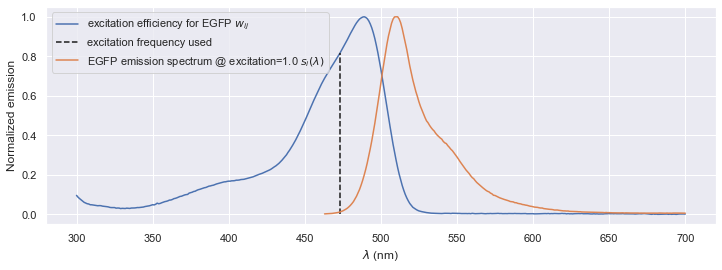

In [4]:
# The normalized emission spectrum should be multiplied by the efficiency based on the excitation laser frequency. 
# Here we use 473 as the single frequency at which excitation occurs. 
# The normalized emission should by multiplied by a factor of ~0.8 in this case. 
# emission spectrum nans are okay to treat as zeros.

eff_egfp = IndicatorSpectra['EGFP ex'][IndicatorSpectra['wavelength']==473]

f, ax = plt.subplots(1,1,figsize=(12,4))
ax.plot(IndicatorSpectra['wavelength'], IndicatorSpectra['EGFP ex'], label=r'excitation efficiency for EGFP $w_{ij}$')
ax.plot([473,473], [0,eff_egfp], '--k',label='excitation frequency used') #j-th channel or j-th laser (used interchangeably)
ax.set(xlabel=r'$\lambda$ (nm)', ylabel='Normalized emission')
ax.plot(IndicatorSpectra['wavelength'], IndicatorSpectra['EGFP em'], label=r'EGFP emission spectrum @ excitation=1.0 $s_i(\lambda)$')
ax.legend(loc='upper left')
plt.show()

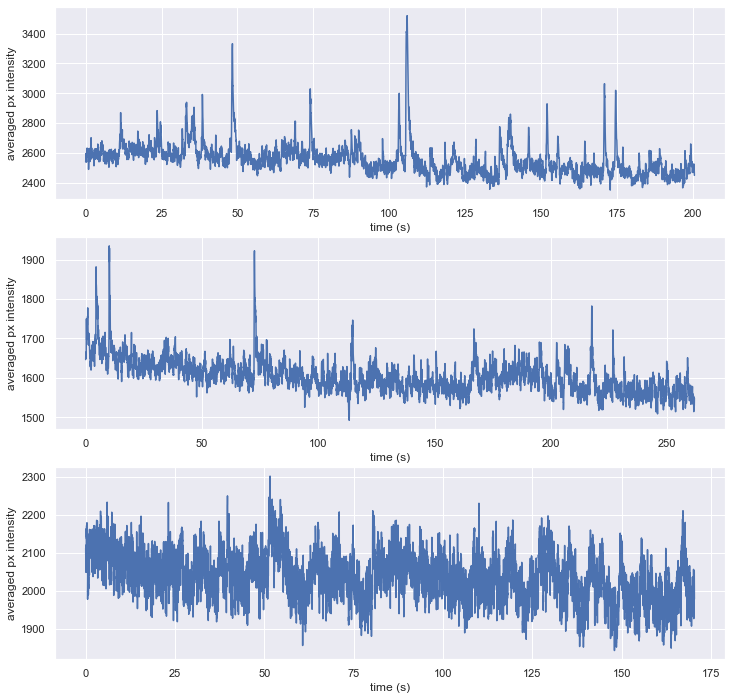

In [5]:
# different animals (expression levels of ), different excitation laser powers, 
# system is still changing, green looks too noisy
# downward drift is likely bleaching
GCaMP8s_2 = GCaMP8s_2.loc[GCaMP8s_2['signal']>1250]
f, ax = plt.subplots(3,1,figsize=(12,12))
ax[0].plot(GCaMP8s_1['time'], GCaMP8s_1['signal'], label='1')
ax[1].plot(GCaMP8s_2['time'], GCaMP8s_2['signal'], label='2')
ax[2].plot(GCaMP8s_3['time'], GCaMP8s_3['signal'], label='3')
for a in ax:
    a.set(xlabel=r'time (s)', ylabel='averaged px intensity')
plt.show()

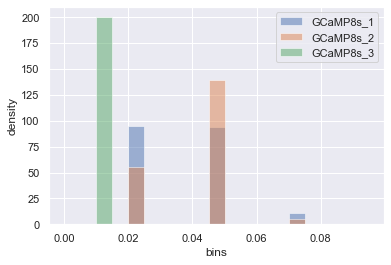

In [6]:
 _ = plt.hist(GCaMP8s_1['time'].diff(),density=True, bins=np.arange(0,0.1,0.005), alpha=0.5, label='GCaMP8s_1')
 _ = plt.hist(GCaMP8s_2['time'].diff(),density=True, bins=np.arange(0,0.1,0.005), alpha=0.5, label='GCaMP8s_2')
 _ = plt.hist(GCaMP8s_3['time'].diff(),density=True, bins=np.arange(0,0.1,0.005), alpha=0.5, label='GCaMP8s_3')
 ax = plt.gca()
 ax.set(xlabel='bins',ylabel='density')
 plt.legend()
 plt.show()

In [7]:
# frames are dropped, sampling rates are not exactly the same. Timestamps are accurate.
print('Mean time interval between frames')
for df in [GCaMP8s_1,GCaMP8s_2,GCaMP8s_3]:
    print(f'{df["time"].diff().mean():0.4f} seconds')

Mean time interval between frames
0.0388 seconds
0.0436 seconds
0.0134 seconds


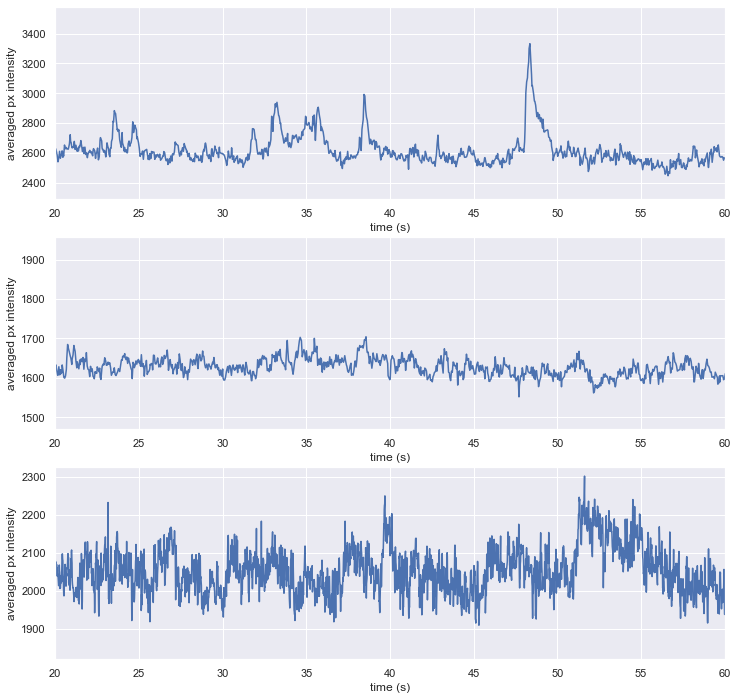

In [8]:
# Inspecting a smaller time interval across recordings:
f, ax = plt.subplots(3,1,figsize=(12,12))
ax[0].plot(GCaMP8s_1['time'], GCaMP8s_1['signal'], label='1')
ax[1].plot(GCaMP8s_2['time'], GCaMP8s_2['signal'], label='2')
ax[2].plot(GCaMP8s_3['time'], GCaMP8s_3['signal'], label='3')
for a in ax:
    a.set(xlabel=r'time (s)', ylabel='averaged px intensity',xlim=(20,60))
plt.show()

In [9]:
# https://www.janelia.org/jgcamp8-calcium-indicators - this has performance of jGCaMP8s in cultured neurons (df/F, half-life)
# ROHAN = Do basic signal processing, look at power spectrum etc. Think about how to model noise.
# Hemodynamic signals can be drawn from chaotic attractor for now.